This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb # import the imdb dataset from keras library 
(train_data, train_labels), (test_data, test_labels) = imdb.load_data( # loading the dataset into train and test data and labels 
    num_words=10000) # including only the top 10,000 most frequently occurring words in the training data

In [2]:
train_data[0] # displaying the first reviews in the training data
# The reviews are stored as a list of word indices
# The words are indexed by their frequency in the dataset

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0] # displaying the first label in the training data
# The labels are 0 for negative and 1 for positive

1

In [4]:
max([max(sequence) for sequence in train_data]) # displaying the maximum index of the word in the training data
# The maximum index is 9999, which means that the dataset is limited to the top 10,000 most frequently occurring words

9999

**Decoding reviews back to text**

In [5]:
word_index = imdb.get_word_index() # getting the word index from the imdb dataset
reverse_word_index = dict( # reversing the word index
    [(value, key) for (key, value) in word_index.items()]) # reversing the word index using dictionary comprehension 
decoded_review = " ".join( # joining the words in the review 
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]) # getting the words from the reversed word index and joining them using join function

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [6]:
import numpy as np # importing numpy library 
def vectorize_sequences(sequences, dimension=10000): # defining a function to vectorize the sequences 
    results = np.zeros((len(sequences), dimension)) # creating an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences): # iterating over the sequences
        for j in sequence: # iterating over the sequence
            results[i, j] = 1. # setting specific indices of results[i] to 1s
    return results # returning the results
x_train = vectorize_sequences(train_data) # vectorizing the training data
x_test = vectorize_sequences(test_data) # vectorizing the test data

In [7]:
x_train[0] # displaying the first vectorized training data

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype("float32") # converting the training labels to numpy array
y_test = np.asarray(test_labels).astype("float32") # converting the test labels to numpy array

### Building your model

**Model definition**

In [9]:
from tensorflow import keras # importing the keras library
from tensorflow.keras import layers # importing the layers module from keras library

model = keras.Sequential([ # creating a sequential model, which is a linear stack of layers
    layers.Dense(16, activation="relu"), # adding a dense layer with 16 units and relu activation function, which is the rectified linear unit
    layers.Dense(16, activation="relu"), # adding a dense layer with 16 units and relu activation function, which is the rectified linear unit
    layers.Dense(1, activation="sigmoid") # adding a dense layer with 1 unit and sigmoid activation function, which is the logistic sigmoid function
])

**Compiling the model**

In [10]:
model.compile(optimizer="rmsprop", # compiling the model with rmsprop optimizer, which is the root mean square propagation
              loss="binary_crossentropy", # compiling the model with binary_crossentropy loss function, which is the binary cross-entropy
              metrics=["accuracy"]) # compiling the model with accuracy metric, which is the accuracy rate

### Validating your approach

**Setting aside a validation set**

In [11]:
x_val = x_train[:10000] # setting the validation data  
partial_x_train = x_train[10000:] # setting the partial training data
y_val = y_train[:10000] # setting the validation labels
partial_y_train = y_train[10000:] # setting the partial training labels

**Training your model**

In [12]:
history = model.fit(partial_x_train, # fitting the model to the training data and labels 
                    partial_y_train, # fitting the model to the training data and labels
                    epochs=20, # setting the number of epochs to 20
                    batch_size=512, # setting the batch size to 512
                    validation_data=(x_val, y_val)) # setting the validation data and labels
# The model is trained for 20 epochs with a batch size of 512 and a validation data of 10,000 samples
# The training and validation loss and accuracy are displayed for each epoch
# The training loss decreases and the training accuracy increases with each epoch
# The validation loss should decrease and the validation accuracy should increase with each epoch

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.4980 - accuracy: 0.7917 - val_loss: 0.3758 - val_accuracy: 0.8712
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2985 - accuracy: 0.9010 - val_loss: 0.3050 - val_accuracy: 0.8876
Epoch 3/20
30/30 [==============================] - 0s 7ms/step - loss: 0.2189 - accuracy: 0.9298 - val_loss: 0.3102 - val_accuracy: 0.8742
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1755 - accuracy: 0.9456 - val_loss: 0.2847 - val_accuracy: 0.8854
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1435 - accuracy: 0.9541 - val_loss: 0.2815 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1165 - accuracy: 0.9641 - val_loss: 0.2973 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0957 - accuracy: 0.9719 - val_loss: 0.3139 - val_accuracy: 0.8821
Epoch 8/20
30/30 [

In [13]:
history_dict = history.history # getting the history of the model
history_dict.keys() # displaying the keys of the history dictionary
# The keys are loss, accuracy, val_loss, and val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/

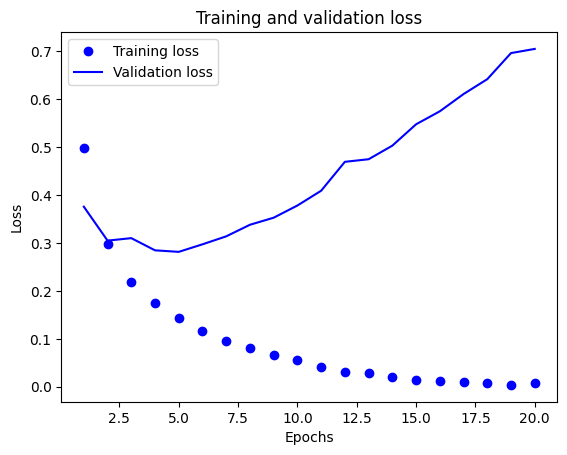

In [14]:
import matplotlib.pyplot as plt # importing the matplotlib library
history_dict = history.history # getting the history of the model
loss_values = history_dict["loss"] # getting the loss values from the history dictionary
val_loss_values = history_dict["val_loss"] # getting the validation loss values from the history dictionary
epochs = range(1, len(loss_values) + 1) # setting the range of epochs to the length of loss values + 1
plt.plot(epochs, loss_values, "bo", label="Training loss") # plotting the training loss values 
plt.plot(epochs, val_loss_values, "b", label="Validation loss") # plotting the validation loss values 
plt.title("Training and validation loss") # setting the title of the plot
plt.xlabel("Epochs") # setting the x-axis label
plt.ylabel("Loss") # setting the y-axis label
plt.legend() # displaying the legend
plt.show() # displaying the plot
# The plot shows the training and validation loss values for each epoch
# The training loss decreases with each epoch, while the validation loss decreases and then increases after a certain number of epochs
# This indicates that the model is overfitting the training data after a certain number of epochs 

**Plotting the training and validation accuracy**

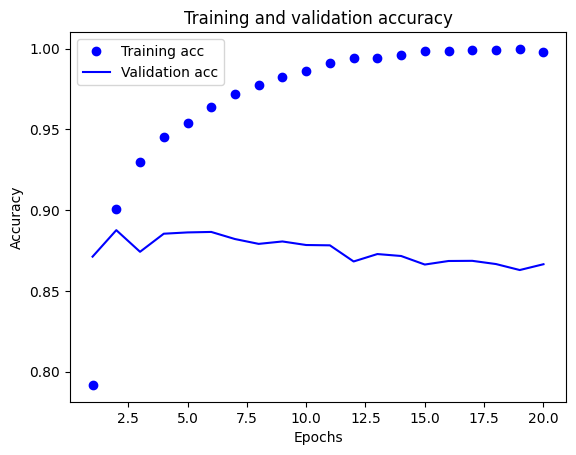

In [15]:
plt.clf() # clearing the plot
acc = history_dict["accuracy"] # getting the accuracy values from the history dictionary
val_acc = history_dict["val_accuracy"] # getting the validation accuracy values from the history dictionary
plt.plot(epochs, acc, "bo", label="Training acc") # plotting the training accuracy values
plt.plot(epochs, val_acc, "b", label="Validation acc") # plotting the validation accuracy values
plt.title("Training and validation accuracy") # setting the title of the plot
plt.xlabel("Epochs") # setting the x-axis label
plt.ylabel("Accuracy") # setting the y-axis label
plt.legend() # displaying the legend
plt.show() # displaying the plot
# The plot shows the training and validation accuracy values for each epoch
# The training accuracy increases with each epoch, while the validation accuracy increases and then decreases after a certain number of epochs
# This indicates that the model is overfitting the training data after a certain number of epochs

**Retraining a model from scratch**

In [16]:
model = keras.Sequential([ # creating a sequential model, which is a linear stack of layers
    layers.Dense(16, activation="relu"), # adding a dense layer with 16 units and relu activation function, which is the rectified linear unit
    layers.Dense(16, activation="relu"), # adding a dense layer with 16 units and relu activation function, which is the rectified linear unit
    layers.Dense(1, activation="sigmoid") # adding a dense layer with 1 unit and sigmoid activation function, which is the logistic sigmoid function
]) 
model.compile(optimizer="rmsprop", # compiling the model with rmsprop optimizer, which is the root mean square propagation
              loss="binary_crossentropy", # compiling the model with binary_crossentropy loss function, which is the binary cross-entropy
              metrics=["accuracy"]) # compiling the model with accuracy metric, which is the accuracy rate
model.fit(x_train, y_train, epochs=4, batch_size=512) # fitting the model to the training data and labels
results = model.evaluate(x_test, y_test) # evaluating the model on the test data and labels
# The model is trained for 4 epochs with a batch size of 512
# The model is evaluated on the test data and labels
# The loss and accuracy are displayed for the test data, which is the unseen data
# The model should have a similar accuracy on the test data as on the training data if it is not overfitting the training data
# The loss should be low and the accuracy should be high on the test data if the model is performing well

Epoch 1/4
49/49 [==============================] - 1s 7ms/step - loss: 0.4503 - accuracy: 0.8193
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2598 - accuracy: 0.9100
Epoch 3/4
49/49 [==============================] - 0s 5ms/step - loss: 0.2016 - accuracy: 0.9281
Epoch 4/4
782/782 [==============================] - 0s 421us/step - loss: 0.2936 - accuracy: 0.8845


In [17]:
results # displaying the results of the model
# The results are the loss and accuracy of the model on the test data
# The loss should be low and the accuracy should be high if the model is performing well on the test data
# In this case, the loss is 0.29 and the accuracy is 0.88, which indicates that the model is performing well on the test data

[0.29356521368026733, 0.8844799995422363]

### Using a trained model to generate predictions on new data

In [18]:
model.predict(x_test) # predicting the test data using the model
# The model predicts the sentiment of the test data as positive or negative
# The predictions are probabilities between 0 and 1, where values closer to 1 indicate positive sentiment and values closer to 0 indicate negative sentiment
# The model can be used to predict the sentiment of new reviews by vectorizing the text and passing it to the model for prediction

782/782 [==============================] - 0s 528us/step


array([[0.16036838],
       [0.9997053 ],
       [0.77376145],
       ...,
       [0.06807633],
       [0.05663321],
       [0.4940837 ]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [19]:
from tensorflow.keras.datasets import reuters # importing the reuters dataset from keras library
(train_data, train_labels), (test_data, test_labels) = reuters.load_data( # loading the dataset into train and test data and labels
    num_words=10000) # including only the top 10,000 most frequently occurring words in the training data

In [20]:
len(train_data) # displaying the length of the training data
# The length of the training data is 8982, which means there are 8982 reviews in the training data

8982

In [21]:
len(test_data) # displaying the length of the test data
# The length of the test data is 2246, which means there are 2246 reviews in the test data

2246

In [22]:
train_data[10] # displaying the 10th review in the training data
# The reviews are stored as a list of word indices that represent the words in the review 

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [23]:
word_index = reuters.get_word_index() # getting the word index from the reuters dataset
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # reversing the word index using dictionary comprehension
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]]) # getting the words from the reversed word index and joining them using join function

In [24]:
train_labels[10] # displaying the 10th label in the training data
# The labels are integers that represent the category of the news article
# The labels range from 0 to 45, which correspond to different categories of news articles
# The 10th label is 3, which corresponds to the category "earn"

3

### Preparing the data

**Encoding the input data**

In [25]:
x_train = vectorize_sequences(train_data) # vectorizing the training data
x_test = vectorize_sequences(test_data) # vectorizing the test data

**Encoding the labels**

In [26]:
def to_one_hot(labels, dimension=46): # defining a function to one-hot encode the labels
    results = np.zeros((len(labels), dimension)) # creating an all-zero matrix of shape (len(labels), dimension)
    for i, label in enumerate(labels): # iterating over the labels
        results[i, label] = 1. # setting specific indices of results[i] to 1s
    return results # returning the results
y_train = to_one_hot(train_labels) # one-hot encoding the training labels
y_test = to_one_hot(test_labels) # one-hot encoding the test labels

In [27]:
from tensorflow.keras.utils import to_categorical # importing the to_categorical function from keras library
y_train = to_categorical(train_labels) # one-hot encoding the training labels, because the labels are integers that represent the category of the news article and the model needs one-hot encoded labels
y_test = to_categorical(test_labels) # one-hot encoding the test labels, because the labels are integers that represent the category of the news article and the model needs one-hot encoded labels

### Building your model

**Model definition**

In [28]:
model = keras.Sequential([ # creating a sequential model, which is a linear stack of layers
    layers.Dense(64, activation="relu"), # adding a dense layer with 64 units and relu activation function, which is the rectified linear unit
    layers.Dense(64, activation="relu"), # adding a dense layer with 64 units and relu activation function, which is the rectified linear unit
    layers.Dense(46, activation="softmax") # adding a dense layer with 46 units and softmax activation function, which is the softmax function
])

**Compiling the model**

In [29]:
model.compile(optimizer="rmsprop", # compiling the model with rmsprop optimizer, which is the root mean square propagation
              loss="categorical_crossentropy", # compiling the model with categorical_crossentropy loss function, which is the categorical cross-entropy
              metrics=["accuracy"]) # compiling the model with accuracy metric, which is the accuracy rate to evaluate the model

### Validating your approach

**Setting aside a validation set**

In [30]:
x_val = x_train[:1000] # setting the validation data to the first 1000 samples of the training data 
partial_x_train = x_train[1000:] # setting the partial training data to the rest of the training data 
y_val = y_train[:1000] # setting the validation labels to the first 1000 samples of the training labels
partial_y_train = y_train[1000:] # setting the partial training labels to the rest of the training labels

**Training the model**

In [31]:
history = model.fit(partial_x_train, # fitting the model to the training data and labels
                    partial_y_train, # fitting the model to the training data and labels
                    epochs=20, # setting the number of epochs to 20
                    batch_size=512, # setting the batch size to 512
                    validation_data=(x_val, y_val)) # setting the validation data and labels
# The model is trained for 20 epochs with a batch size of 512 and a validation data of 1000 samples
# The training and validation loss and accuracy are displayed for each epoch
# The training loss decreases and the training accuracy increases with each epoch
# The validation loss decreases and the validation accuracy increases with each epoch 

Epoch 1/20
16/16 [==============================] - 1s 18ms/step - loss: 2.6050 - accuracy: 0.4480 - val_loss: 1.8007 - val_accuracy: 0.6130
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.5039 - accuracy: 0.6854 - val_loss: 1.3820 - val_accuracy: 0.6930
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.1184 - accuracy: 0.7582 - val_loss: 1.1768 - val_accuracy: 0.7560
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.8744 - accuracy: 0.8172 - val_loss: 1.0629 - val_accuracy: 0.7760
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6967 - accuracy: 0.8540 - val_loss: 0.9857 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 0s 11ms/step - loss: 0.5567 - accuracy: 0.8877 - val_loss: 0.9410 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 0s 10ms/step - loss: 0.4481 - accuracy: 0.9068 - val_loss: 0.9182 - val_accuracy: 0.8130
Epoch 8/20
16

**Plotting the training and validation loss**

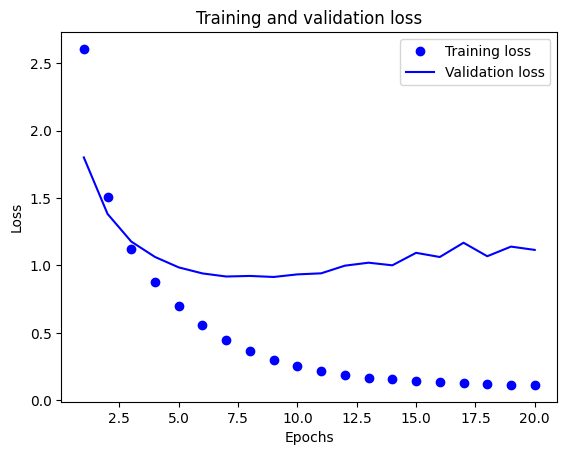

In [32]:
loss = history.history["loss"] # getting the loss values from the history dictionary
val_loss = history.history["val_loss"] # getting the validation loss values from the history dictionary
epochs = range(1, len(loss) + 1) # setting the range of epochs to the length of loss values + 1
plt.plot(epochs, loss, "bo", label="Training loss") # plotting the training loss values
plt.plot(epochs, val_loss, "b", label="Validation loss") # plotting the validation loss values
plt.title("Training and validation loss") # setting the title of the plot
plt.xlabel("Epochs") # setting the x-axis label
plt.ylabel("Loss") # setting the y-axis label
plt.legend() # displaying the legend
plt.show() # displaying the plot
# The plot shows the training and validation loss values for each epoch
# The training loss decreases with each epoch, while the validation loss decreases and then increases after a certain number of epochs
# This indicates that the model is overfitting the training data after a certain number of epochs

**Plotting the training and validation accuracy**

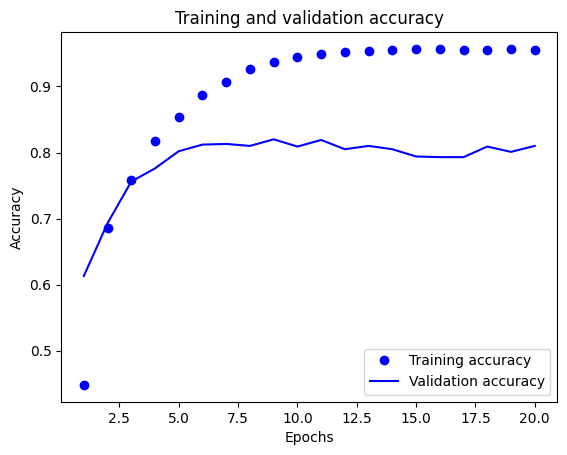

In [33]:
plt.clf() # clearing the plot
acc = history.history["accuracy"] # getting the accuracy values from the history dictionary
val_acc = history.history["val_accuracy"] # getting the validation accuracy values from the history dictionary
plt.plot(epochs, acc, "bo", label="Training accuracy") # plotting the training accuracy values
plt.plot(epochs, val_acc, "b", label="Validation accuracy") # plotting the validation accuracy values
plt.title("Training and validation accuracy") # setting the title of the plot
plt.xlabel("Epochs") # setting the x-axis label
plt.ylabel("Accuracy") # setting the y-axis label
plt.legend() # displaying the legend
plt.show() # displaying the plot
# The plot shows the training and validation accuracy values for each epoch
# The training accuracy increases with each epoch, while the validation accuracy increases and then sort of stabilizes after a certain number of epochs
# This indicates that the model is overfitting the training data after a certain number of epochs

**Retraining a model from scratch**

In [34]:
model = keras.Sequential([ # creating a sequential model, which is a linear stack of layers
  layers.Dense(64, activation="relu"), # adding a dense layer with 64 units and relu activation function, which is the rectified linear unit
  layers.Dense(64, activation="relu"), # adding a dense layer with 64 units and relu activation function, which is the rectified linear unit
  layers.Dense(46, activation="softmax") # adding a dense layer with 46 units and softmax activation function, which is the softmax function
])
model.compile(optimizer="rmsprop", # compiling the model with rmsprop optimizer, which is the root mean square propagation
              loss="categorical_crossentropy", # compiling the model with categorical_crossentropy loss function, which is the categorical cross-entropy
              metrics=["accuracy"]) # compiling the model with accuracy metric, which is the accuracy rate to evaluate the model
model.fit(x_train, y_train, # fitting the model to the training data and labels
          epochs=9, # setting the number of epochs to 9
          batch_size=512) # setting the batch size to 512
results = model.evaluate(x_test, y_test) # evaluating the model on the test data and labels

Epoch 1/9
18/18 [==============================] - 0s 10ms/step - loss: 2.5053 - accuracy: 0.5465
Epoch 2/9
18/18 [==============================] - 0s 9ms/step - loss: 1.3560 - accuracy: 0.7098
Epoch 3/9
18/18 [==============================] - 0s 10ms/step - loss: 1.0067 - accuracy: 0.7833
Epoch 4/9
18/18 [==============================] - 0s 9ms/step - loss: 0.7898 - accuracy: 0.8368
Epoch 5/9
18/18 [==============================] - 0s 9ms/step - loss: 0.6251 - accuracy: 0.8684
Epoch 6/9
18/18 [==============================] - 0s 9ms/step - loss: 0.5000 - accuracy: 0.8956
Epoch 7/9
18/18 [==============================] - 0s 9ms/step - loss: 0.4038 - accuracy: 0.9125
Epoch 8/9
18/18 [==============================] - 0s 10ms/step - loss: 0.3285 - accuracy: 0.9292
Epoch 9/9
71/71 [==============================] - 0s 645us/step - loss: 0.9918 - accuracy: 0.7925


In [35]:
results # displaying the results of the model
# The results are the loss and accuracy of the model on the test data
# The loss should be low and the accuracy should be high if the model is performing well on the test data
# In this case, the loss is 1.03 and the accuracy is 0.79, which indicates that the model is performing well on the test data

[0.9917522668838501, 0.7925200462341309]

In [36]:
import copy # importing the copy library 
test_labels_copy = copy.copy(test_labels) # copying the test labels
np.random.shuffle(test_labels_copy) # shuffling the test labels
hits_array = np.array(test_labels) == np.array(test_labels_copy) # comparing the test labels with the shuffled test labels
hits_array.mean() # calculating the mean of the hits array
# The mean is 0.18, which indicates that the accuracy of the model is 0.79 and the accuracy of random guessing is 0.18
# The model performs significantly better than random guessing, which indicates that the model is learning meaningful patterns in the data

0.1892252894033838

### Generating predictions on new data

In [37]:
predictions = model.predict(x_test) # predicting the test data using the model

71/71 [==============================] - 0s 571us/step


In [38]:
predictions[0].shape # displaying the shape of the first prediction
# The shape is (46,), which means that the prediction is a vector of length 46

(46,)

In [39]:
np.sum(predictions[0]) # summing the first prediction
# The sum is 1, which means that the prediction is a probability distribution over the 46 different categories

1.0

In [40]:
np.argmax(predictions[0]) # getting the index of the maximum value in the first prediction
# The index is 3, which means that the model predicts the category of the first news article as 3

3

### A different way to handle the labels and the loss

In [41]:
y_train = np.array(train_labels) # converting the training labels to numpy array because the labels are integers that represent the category of the news article and the model needs one-hot encoded labels
y_test = np.array(test_labels) # converting the test labels to numpy array because the labels are integers that represent the category of the news article and the model needs one-hot encoded labels

In [42]:
model.compile(optimizer="rmsprop", # compiling the model with rmsprop optimizer because it is a good default optimizer that works well in practice due to its adaptive learning rate
              loss="sparse_categorical_crossentropy", # compiling the model with sparse_categorical_crossentropy loss function which is used when the labels are integers
              metrics=["accuracy"]) # compiling the model with accuracy metric to evaluate the model, which is used because it is a classification problem and accuracy is a common metric for classification problems

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [43]:
model = keras.Sequential([ # creating a sequential model which is a linear stack of layers
    layers.Dense(64, activation="relu"), # adding a dense layer with 64 units and relu activation function (we use 64 units because it is a small dataset)
    layers.Dense(4, activation="relu"), # adding a dense layer with 4 units and relu activation function (we use 4 units because it is a small dataset)
    layers.Dense(46, activation="softmax") # adding a dense layer with 46 units and softmax activation function (we use 46 units because there are 46 different categories)
])
model.compile(optimizer="rmsprop", # compiling the model with rmsprop optimizer which is the root mean square propagation optimizer that works well in practice due to its adaptive learning rate 
              loss="categorical_crossentropy", # compiling the model with categorical_crossentropy loss function which is the categorical cross-entropy loss function used for multiclass classification problems
              metrics=["accuracy"]) # compiling the model with accuracy metric which is the accuracy rate used to evaluate the model
model.fit(partial_x_train, partial_y_train, # fitting the model to the training data and labels 
          epochs=20, # setting the number of epochs to 20 because it is a small dataset and we want to train the model for a sufficient number of epochs
          batch_size=128, # setting the batch size to 128 because it is a small dataset and we want to use a smaller batch size for faster training
          validation_data=(x_val, y_val)) # setting the validation data and labels to evaluate the model during training

Epoch 1/20
63/63 [==============================] - 1s 5ms/step - loss: 2.7086 - accuracy: 0.3954 - val_loss: 2.0025 - val_accuracy: 0.5200
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 1.6354 - accuracy: 0.6481 - val_loss: 1.4987 - val_accuracy: 0.6700
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 1.2634 - accuracy: 0.7165 - val_loss: 1.3812 - val_accuracy: 0.6940
Epoch 4/20
63/63 [==============================] - 0s 4ms/step - loss: 1.1026 - accuracy: 0.7347 - val_loss: 1.3359 - val_accuracy: 0.6980
Epoch 5/20
63/63 [==============================] - 0s 4ms/step - loss: 0.9945 - accuracy: 0.7468 - val_loss: 1.3531 - val_accuracy: 0.6960
Epoch 6/20
63/63 [==============================] - 0s 4ms/step - loss: 0.9165 - accuracy: 0.7524 - val_loss: 1.3415 - val_accuracy: 0.6950
Epoch 7/20
63/63 [==============================] - 0s 4ms/step - loss: 0.8473 - accuracy: 0.7631 - val_loss: 1.3766 - val_accuracy: 0.6950
Epoch 8/20
63/63 [==

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [44]:
from tensorflow.keras.datasets import boston_housing # importing the boston_housing dataset from keras library
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data() # loading the dataset into train and test data and labels

In [45]:
train_data.shape # displaying the shape of the training data
# The shape is (404, 13), which means there are 404 samples and 13 features in the training data

(404, 13)

In [46]:
test_data.shape # displaying the shape of the test data
# The shape is (102, 13), which means there are 102 samples and 13 features in the test data

(102, 13)

In [47]:
train_targets # displaying the training labels
# The labels are the median values of owner-occupied homes in thousands of dollars

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [48]:
mean = train_data.mean(axis=0) # calculating the mean of the training data
train_data -= mean # subtracting the mean from the training data
std = train_data.std(axis=0) # calculating the standard deviation of the training data 
train_data /= std # dividing the training data by the standard deviation
test_data -= mean # subtracting the mean from the test data
test_data /= std # dividing the test data by the standard deviation

### Building your model

**Model definition**

In [49]:
def build_model(): # defining a function to build the model
    model = keras.Sequential([ # creating a sequential model which is a linear stack of layers
        layers.Dense(64, activation="relu"), # adding a dense layer with 64 units and relu activation function 
        layers.Dense(64, activation="relu"), # adding a dense layer with 64 units and relu activation function
        layers.Dense(1) # adding a dense layer with 1 unit (no activation function because it is a regression problem)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"]) # compiling the model with rmsprop optimizer, mse loss function, and mae metric
    return model # returning the model

### Validating your approach using K-fold validation

**K-fold validation**

In [50]:
k = 4 # setting the number of folds to 4 because it is a small dataset
num_val_samples = len(train_data) // k # setting the number of validation samples to the length of the training data divided by k 
num_epochs = 100 # setting the number of epochs to 100 because we want to train the model for a sufficient number of epochs while avoiding overfitting
all_scores = [] # creating an empty list to store the scores
for i in range(k): # iterating over the range of k
    print(f"Processing fold #{i}") # printing the current fold number 
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] # setting the validation data
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples] # setting the validation labels 
    partial_train_data = np.concatenate( # concatenating the training data slices before and after the validation fold
        [train_data[:i * num_val_samples], # concatenating the training data slices before the validation fold
         train_data[(i + 1) * num_val_samples:]], # concatenating the training data slices after the validation fold
        axis=0) # concatenating the training data slices along the 0 axis
    partial_train_targets = np.concatenate( # concatenating the corresponding targets for the training data slices
        [train_targets[:i * num_val_samples], # concatenating the corresponding targets for the training data slices before the validation fold
         train_targets[(i + 1) * num_val_samples:]], # concatenating the corresponding targets for the training data slices after the validation fold
        axis=0) # concatenating the corresponding targets for the training data slices along the 0 axis
    model = build_model() # building the model
    model.fit(partial_train_data, partial_train_targets, # fitting the model to the partial training data and labels
              epochs=num_epochs, batch_size=16, verbose=0) # setting the number of epochs, batch size, and verbose
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0) # evaluating the model on the validation data and labels
    all_scores.append(val_mae) # appending the validation mae to the scores list

Processing fold #0


Processing fold #1
Processing fold #2
Processing fold #3


In [51]:
all_scores # displaying the scores
# The scores are the mean absolute errors for each fold
# The scores are used to evaluate the model's performance on the validation data
# The scores can be used to tune the hyperparameters of the model and improve its performance
# The scores from each fold can be averaged to get an overall estimate of the model's performance
# The lower the score, the better the model's performance
# In this case, the scores range from around 1.8 to 2.6 which indicates that the model's performance is around $2,000 off on average in predicting the median values of owner-occupied homes in thousands of dollars

[1.8764383792877197, 2.5203328132629395, 2.6035525798797607, 2.348914861679077]

In [52]:
np.mean(all_scores) # calculating the mean of the scores
# The mean is around 2.3 which indicates that the model's performance is around $2,300 off on average in predicting the median values of owner-occupied homes in thousands of dollars

2.3373096585273743

**Saving the validation logs at each fold**

In [53]:
num_epochs = 500 # setting the number of epochs to 500
all_mae_histories = [] # creating an empty list to store the mae histories
for i in range(k): # iterating over the range of k
    print(f"Processing fold #{i}") # printing the current fold number
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] # setting the validation data
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples] # setting the validation labels
    partial_train_data = np.concatenate( # concatenating the training data slices before and after the validation fold
        [train_data[:i * num_val_samples], # concatenating the training data slices before the validation fold
         train_data[(i + 1) * num_val_samples:]], # concatenating the training data slices after the validation fold
        axis=0) # concatenating the training data slices along the 0 axis
    partial_train_targets = np.concatenate( # concatenating the corresponding targets for the training data slices
        [train_targets[:i * num_val_samples], # concatenating the corresponding targets for the training data slices before the validation fold
         train_targets[(i + 1) * num_val_samples:]], # concatenating the corresponding targets for the training data slices after the validation fold
        axis=0) # concatenating the corresponding targets for the training data slices along the 0 axis
    model = build_model() # building the model
    history = model.fit(partial_train_data, partial_train_targets, # fitting the model to the partial training data and labels
                        validation_data=(val_data, val_targets), # setting the validation data and labels
                        epochs=num_epochs, batch_size=16, verbose=0) # setting the number of epochs, batch size, and verbose
    mae_history = history.history["val_mae"] # getting the validation mae history
    all_mae_histories.append(mae_history) # appending the validation mae history to the mae histories list

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [54]:
average_mae_history = [ # calculating the average mae history
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)] # calculating the mean of the mae histories for each epoch

**Plotting validation scores**

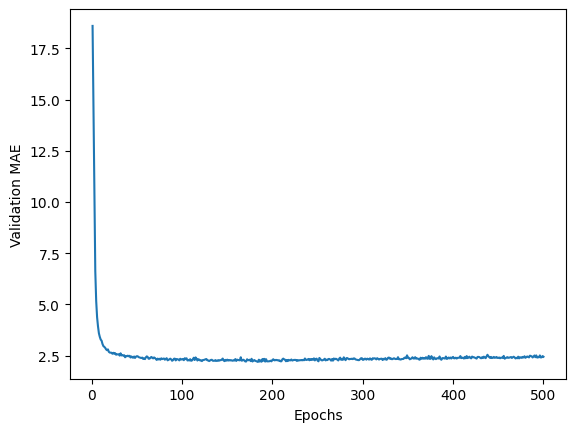

In [55]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history) # plotting the average mae history
plt.xlabel("Epochs") # setting the x-axis label
plt.ylabel("Validation MAE") # setting the y-axis label
plt.show() # displaying the plot
# The plot shows the average validation mae history for each epoch
# In this case, the plot shows that the model's performance improves with each epoch and then stabilizes after a certain number of epochs

**Plotting validation scores, excluding the first 10 data points**

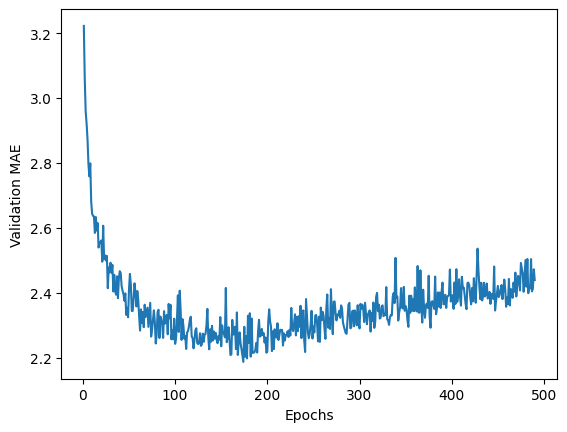

In [56]:
truncated_mae_history = average_mae_history[10:] # truncating the average mae history
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history) # plotting the truncated average mae history
plt.xlabel("Epochs") # setting the x-axis label
plt.ylabel("Validation MAE") # setting the y-axis label
plt.show() # displaying the plot
# The plot shows the truncated average validation mae history for each epoch
# In this case, the plot shows that the model's performance improves with each epoch and then stabilizes after a certain number of epochs, untiil it ri$

**Training the final model**

In [57]:
model = build_model() # building the model
model.fit(train_data, train_targets, epochs=130, batch_size=16, verbose=0) # fitting the model to the training data and labels
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets) # evaluating the model on the test data and labels

4/4 [==============================] - 0s 716us/step - loss: 15.1123 - mae: 2.5481


In [58]:
test_mae_score # displaying the test mae score
# The test mae score is around 2.5 which indicates that the model's performance is around $2,500 off on average in predicting the median values of owner-occupied homes in thousands of dollars

2.54814076423645

### Generating predictions on new data

In [59]:
predictions = model.predict(test_data) # predicting the test data using the model
predictions[0] # displaying the first prediction
# The prediction is the median value of the owner-occupied home in thousands of dollars
# The prediction is a continuous value that represents the model's estimate of the median value of the owner-occupied home
# The output shows array([8.162551], dtype=float32) which means the model predicts the median value of the owner-occupied home as $8,162.55
# The model can be used to predict the median values of owner-occupied homes in thousands of dollars for new data by passing the data to the model for prediction

4/4 [==============================] - 0s 609us/step


array([8.162551], dtype=float32)

### Wrapping up

## Summary